## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have 

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
promotion = pd.read_csv('/content/drive/MyDrive/Python - Google Colab/3. Advanced Machine Learmning/Project Alternate/employee_promotion.csv')

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
promotion.shape ## to view dimensions of the train data

(54808, 13)

In [ ]:
# let's create a copy of the data
data = promotion.copy()

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head() ## to view top 5 rows of the data

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                 5.000   
1               other                1   30                 5.000   
2            sourcing                1   34                 3.000   
3               other                2   39                 1.000   
4               other                1   45                 3.000   

   length_of_service  awards_won  avg_training_score  is_promoted  
0                  8           0              49.000            0  
1                  4           0              60.000            0  
2                  7           0              50.000            0  
3                 10           0              50.000            0  
4                  2           0              73.000            0

In [ ]:
# let's view the last 5 rows of the data
data.tail() ## to view last 5 rows of the data

employee_id         department     region         education gender  \
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54803            sourcing                1   48                 3.000   
54804               other                1   37                 2.000   
54805               other                1   27                 5.000   
54806            sourcing                1   29                 1.000   
54807               other                1   27                 1.000   

       length_of_service  awards_won  avg_training_score  is_promoted  
54803                 17           0              78.000            0  
54804                  6           0              56.000            0  
54805                  3           0              79.000            0  
54806                  2           0                 NaN            0  
54807                  5           0              49.000            0

### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum() ## to check duplicate entries in the data

np.int64(0)

### Checking for missing values

In [ ]:
# let's check for missing values in the data
data.isnull().sum() ## to check missing entries in the train data

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

### Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe(include = 'all').T  ## to print the statitical summary of the train data

count unique                top   freq      mean  \
employee_id          54808.000    NaN                NaN    NaN 39195.831   
department               54808      9  Sales & Marketing  16840       NaN   
region                   54808     34           region_2  12343       NaN   
education                52399      3         Bachelor's  36669       NaN   
gender                   54808      2                  m  38496       NaN   
recruitment_channel      54808      3              other  30446       NaN   
no_of_trainings      54808.000    NaN                NaN    NaN     1.253   
age                  54808.000    NaN                NaN    NaN    34.804   
previous_year_rating 50684.000    NaN                NaN    NaN     3.329   
length_of_service    54808.000    NaN                NaN    NaN     5.866   
awards_won           54808.000    NaN                NaN    NaN     0.023   
avg_training_score   52248.000    NaN                NaN    NaN    63.712   
is_promoted          54808.000    NaN                NaN    NaN     0.085   

                           std    min       25%       50%       75%       max  
employee_id          22586.581  1.000 19669.750 39225.500 58730.500 78298.000  
department                 NaN    NaN       NaN       NaN       NaN       NaN  
region                     NaN    NaN       NaN       NaN       NaN       NaN  
education                  NaN    NaN       NaN       NaN       NaN       NaN  
gender                     NaN    NaN       NaN       NaN       NaN       NaN  
recruitment_channel        NaN    NaN       NaN       NaN       NaN       NaN  
no_of_trainings          0.609  1.000     1.000     1.000     1.000    10.000  
age                      7.660 20.000    29.000    33.000    39.000    60.000  
previous_year_rating     1.260  1.000     3.000     3.000     4.000     5.000  
length_of_service        4.265  1.000     3.000     5.000     7.000    37.000  
awards_won               0.150  0.000     0.000     0.000     0.000     1.000  
avg_training_score      13.522 39.000    51.000    60.000    77.000    99.000  
is_promoted              0.279  0.000     0.000     0.000     0.000     1.000

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count      mean       std    min       25%       50%  \
employee_id          54808.000 39195.831 22586.581  1.000 19669.750 39225.500   
no_of_trainings      54808.000     1.253     0.609  1.000     1.000     1.000   
age                  54808.000    34.804     7.660 20.000    29.000    33.000   
previous_year_rating 50684.000     3.329     1.260  1.000     3.000     3.000   
length_of_service    54808.000     5.866     4.265  1.000     3.000     5.000   
awards_won           54808.000     0.023     0.150  0.000     0.000     0.000   
avg_training_score   52248.000    63.712    13.522 39.000    51.000    60.000   
is_promoted          54808.000     0.085     0.279  0.000     0.000     0.000   

                           75%       max  
employee_id          58730.500 78298.000  
no_of_trainings          1.000    10.000  
age                     39.000    60.000  
previous_year_rating     4.000     5.000  
length_of_service        7.000    37.000  
awards_won               0.000     1.000  
avg_training_score      77.000    99.000  
is_promoted              0.000     1.000

**Let's check the number of unique values in each column**

In [ ]:
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in department are :
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
**************************************************
Unique values in region are :
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
data.drop(columns="employee_id", inplace=True)

In [ ]:
data["is_promoted"].value_counts(1)

is_promoted
0   0.915
1   0.085
Name: proportion, dtype: float64

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

#### Observations on No. of Trainings

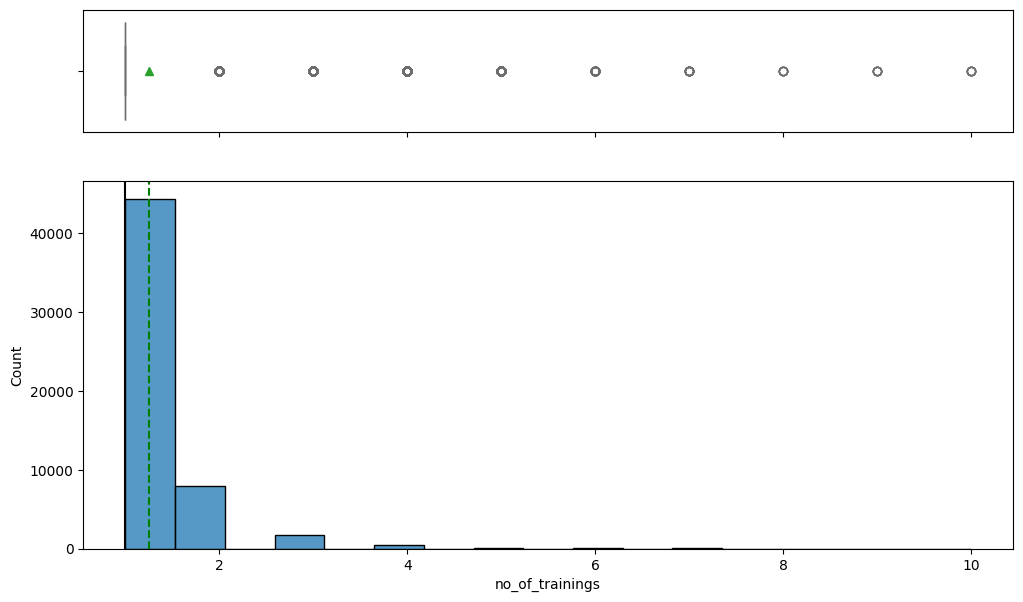

In [ ]:
histogram_boxplot(data, "no_of_trainings")

**Let's see the distribution of age of employee**

#### Observations on Age

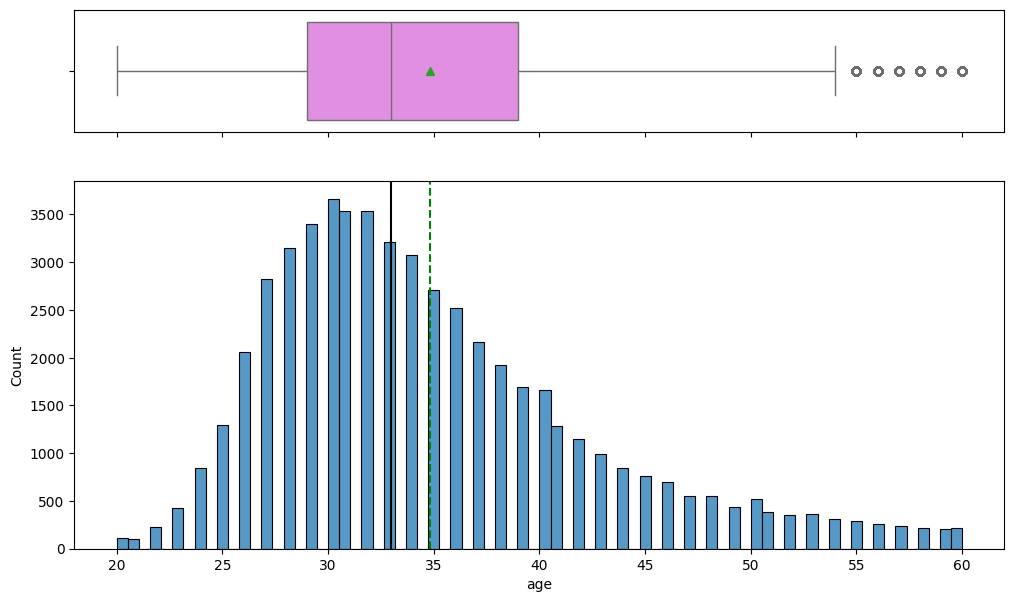

In [ ]:
histogram_boxplot(data,'age')  ## to create histogram_boxplot for 'age'

#### Observations on Length of Service

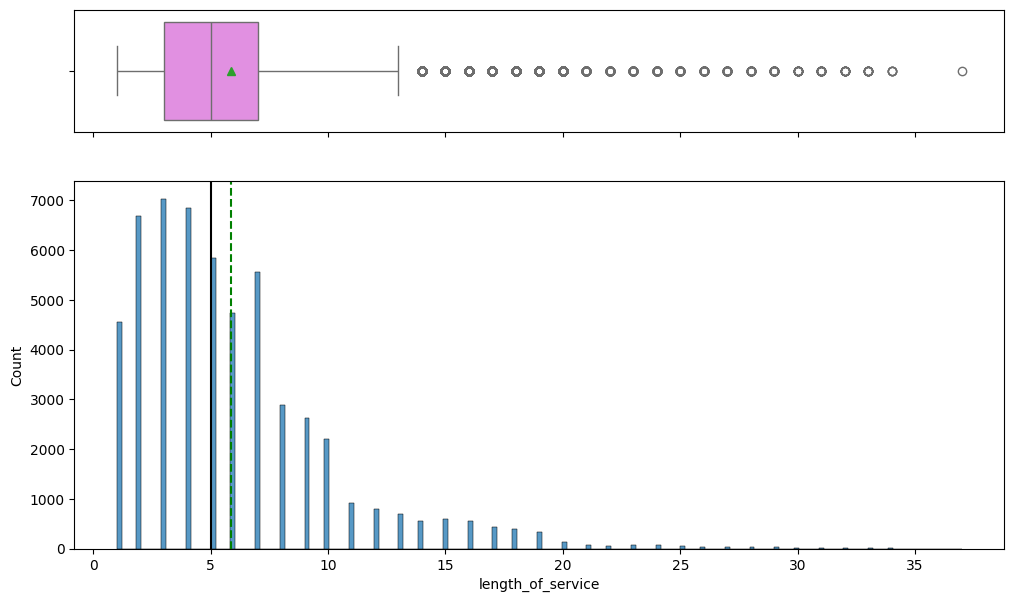

In [ ]:
histogram_boxplot(data,'length_of_service')  ## to create histogram_boxplot for 'length_of_service'

**Let's see the distribution of average training score of employee**

#### Observations on Average Training Score

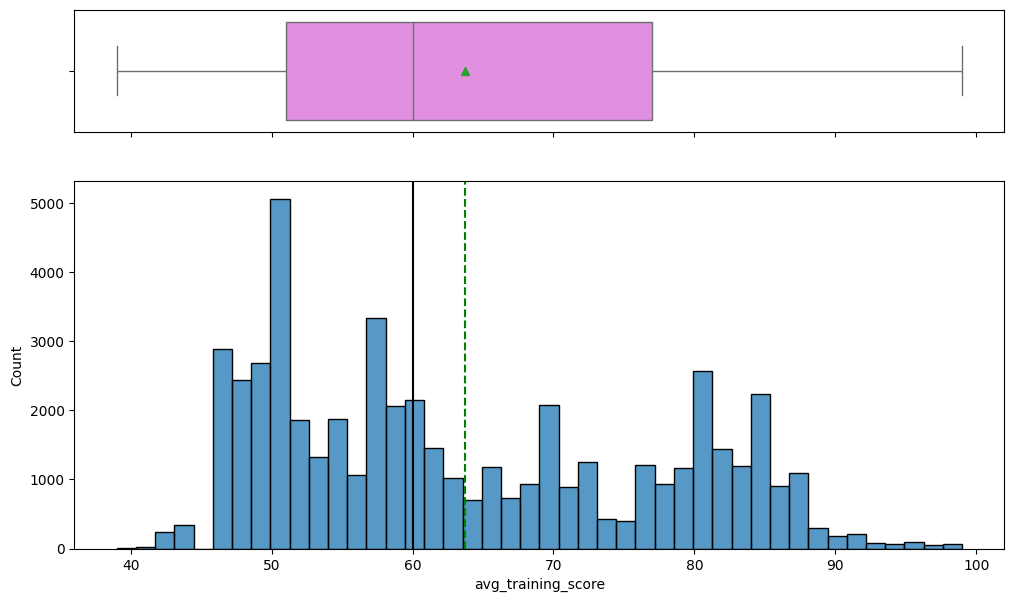

In [ ]:
histogram_boxplot(data,'avg_training_score')  ## to create histogram_boxplot for 'avg_training_score'

#### Observations on Department

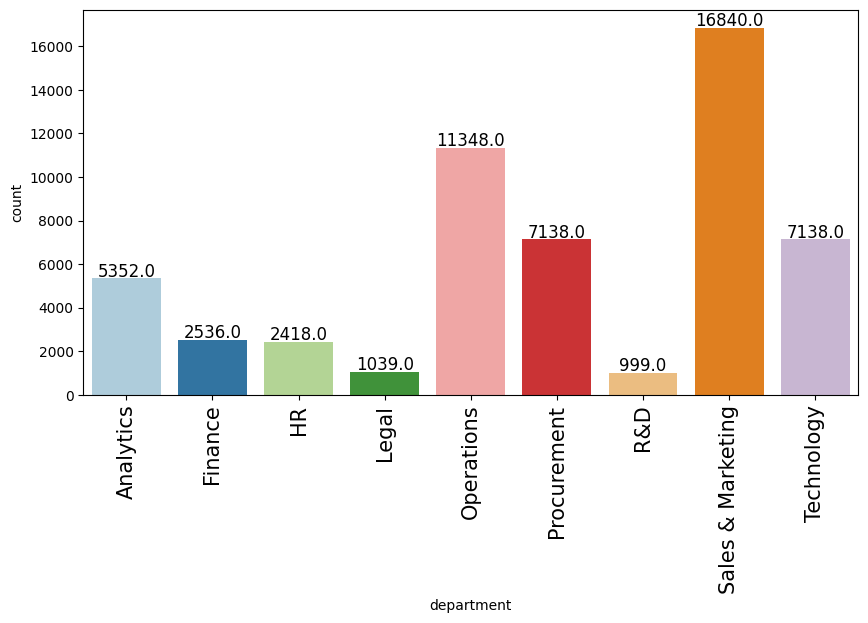

In [ ]:
labeled_barplot(data, "department")

#### Observations on Education

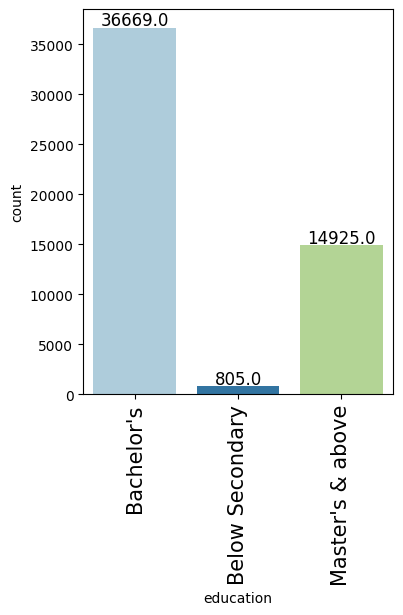

In [ ]:
labeled_barplot(data, "education")

#### Observations on Gender

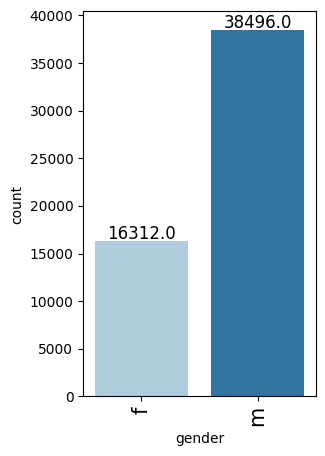

In [ ]:
labeled_barplot(data,'gender') ## to create labeled_barplot for 'gender'

#### Observations on Recruitment Channel

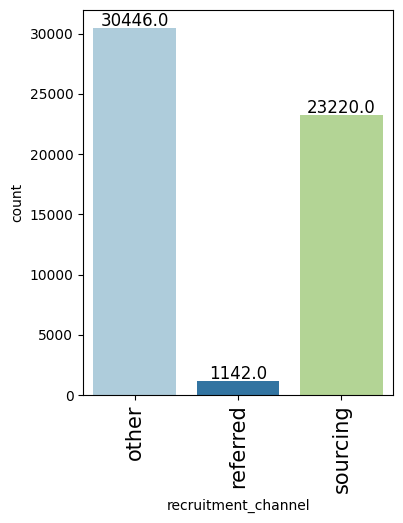

In [ ]:
labeled_barplot(data,'recruitment_channel') ## to create labeled_barplot for 'recruitment_channel'

#### Observations on Previous Year Rating

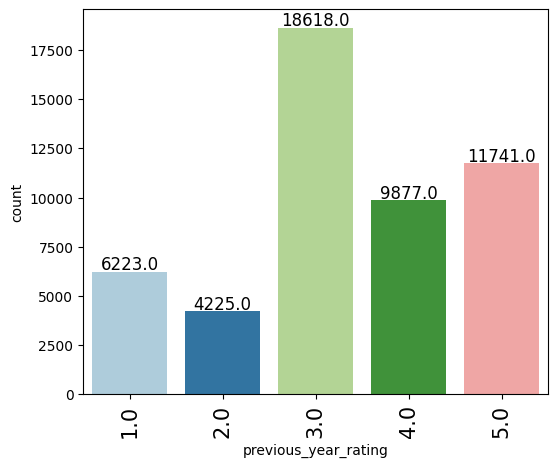

In [ ]:
labeled_barplot(data,'previous_year_rating') ## to create labeled_barplot for 'previous_year_rating'

#### Observations on Awards Won

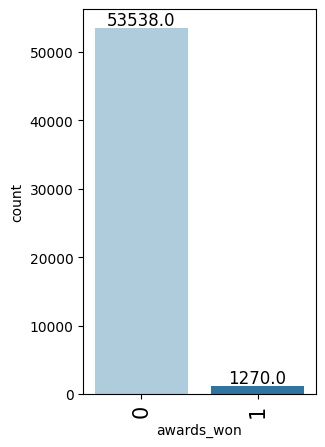

In [ ]:
labeled_barplot(data,'awards_won') ## to create labeled_barplot for 'awards_won'

#### Observations on Region

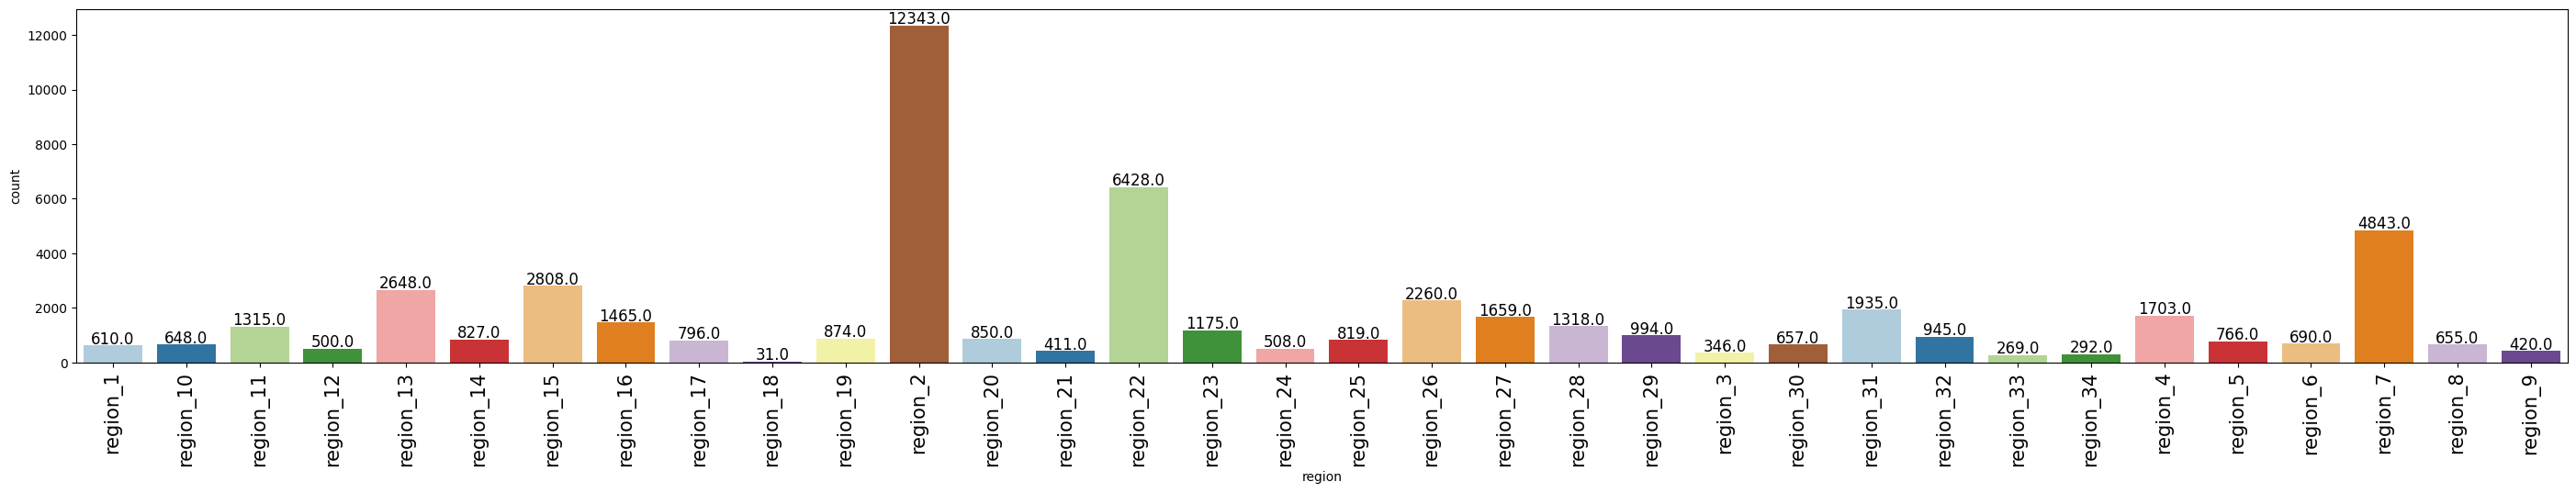

In [ ]:
labeled_barplot(data,'region') ## to create labeled_barplot for 'region'

#### Observations on target variable

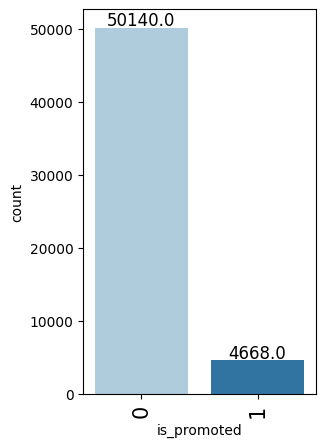

In [ ]:
labeled_barplot(data,'is_promoted') ## to create labeled_barplot for 'is_promoted'

### Bivariate Analysis

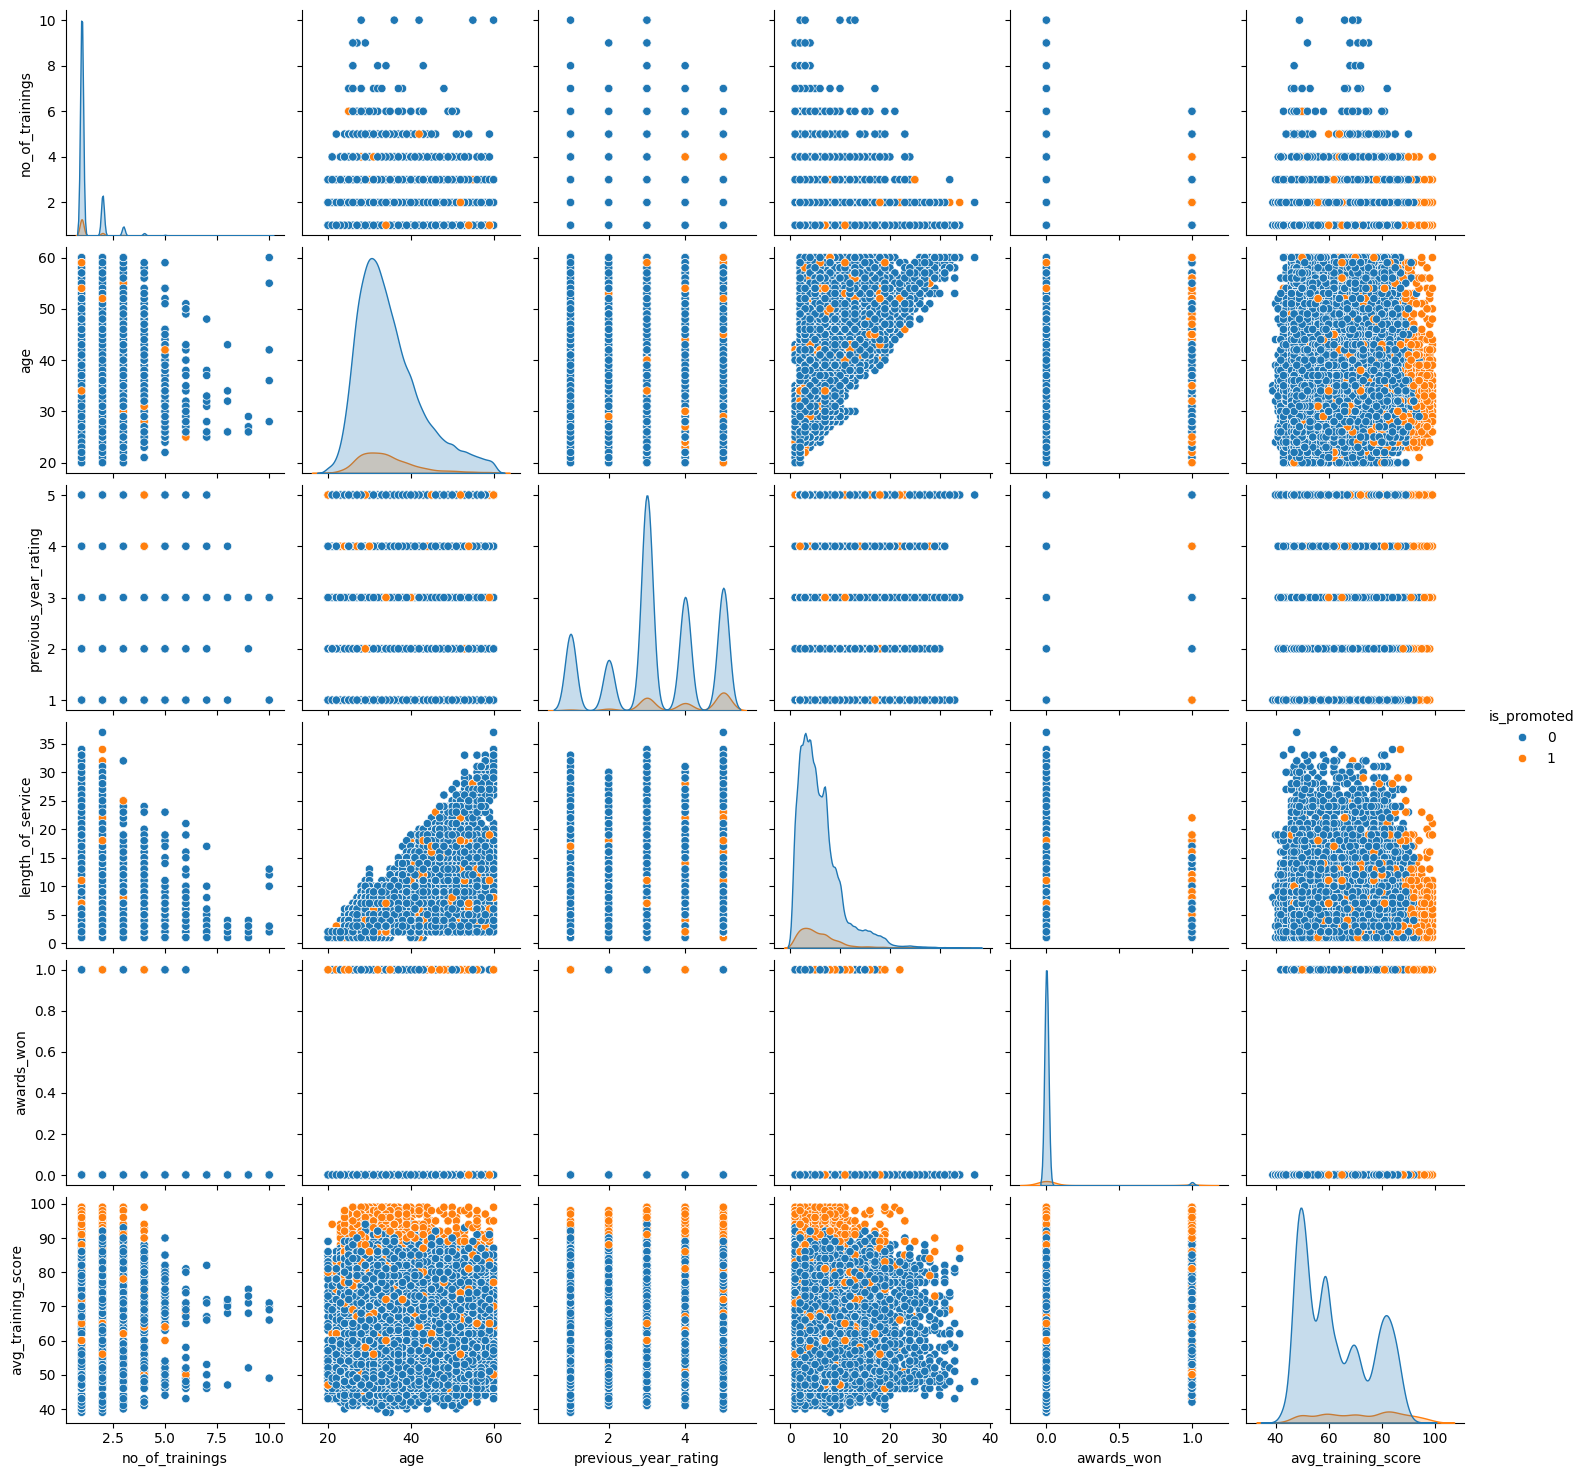

In [ ]:
sns.pairplot(data, hue="is_promoted")

#### Target variable vs Age

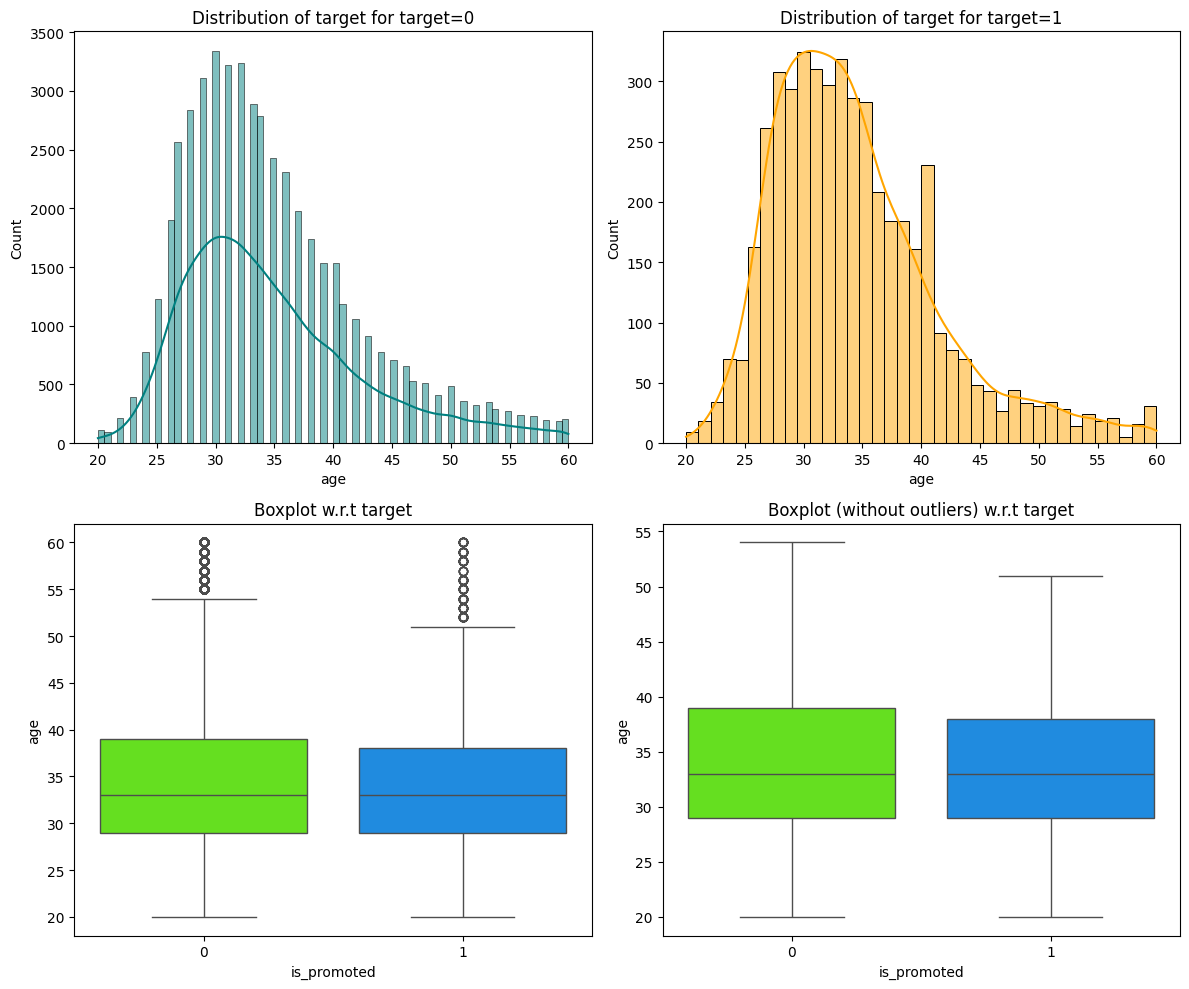

In [ ]:
distribution_plot_wrt_target(data, "age", "is_promoted")

**Let's see the change in length of service (length_of_service) vary by the employee's promotion status (is_promoted)?**

#### Target variable vs Length of Service

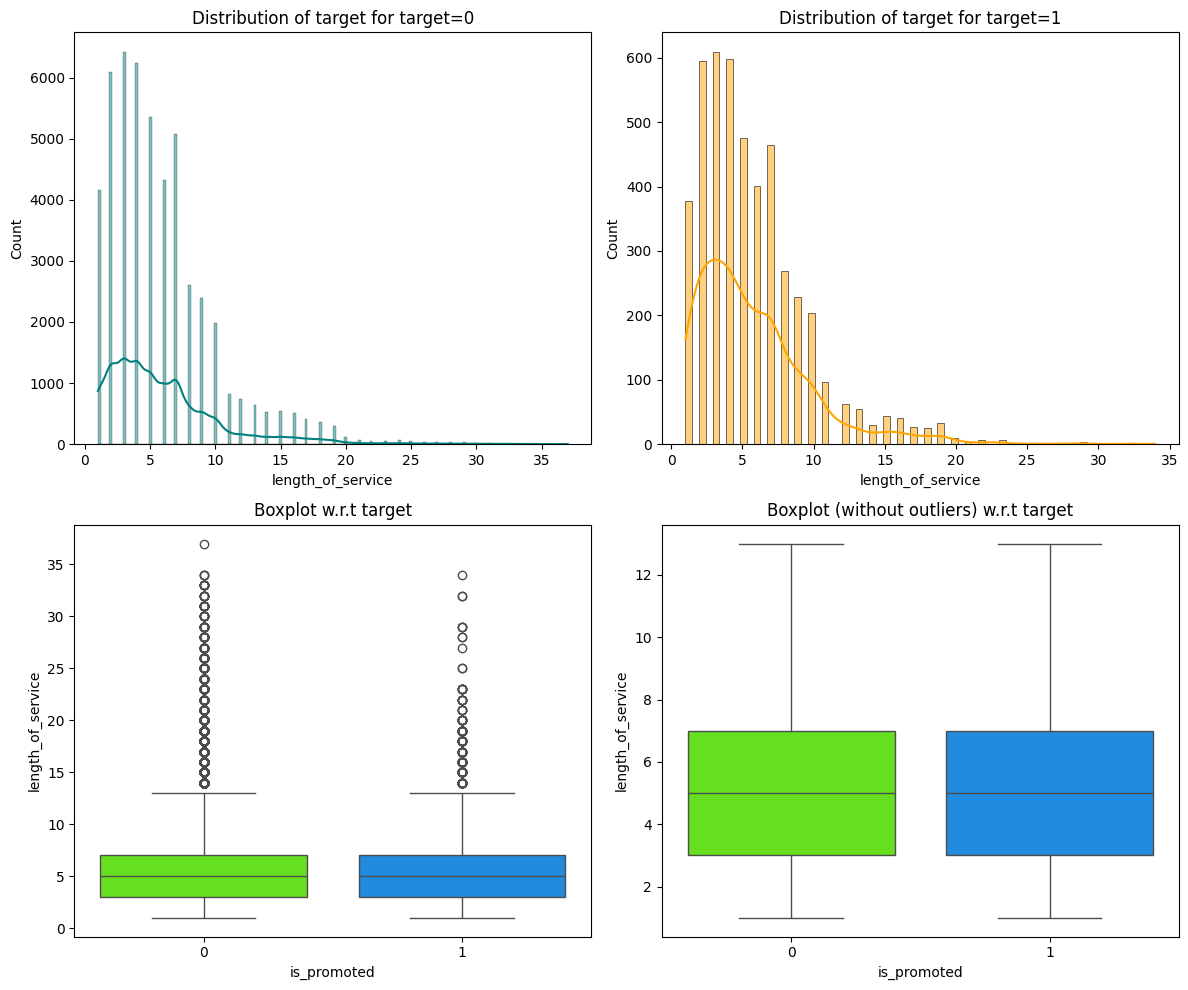

In [ ]:
distribution_plot_wrt_target(data, "length_of_service", "is_promoted") ## to create distribution_plot for length_of_service vs is_promoted

#### Target variable vs Average Training Score

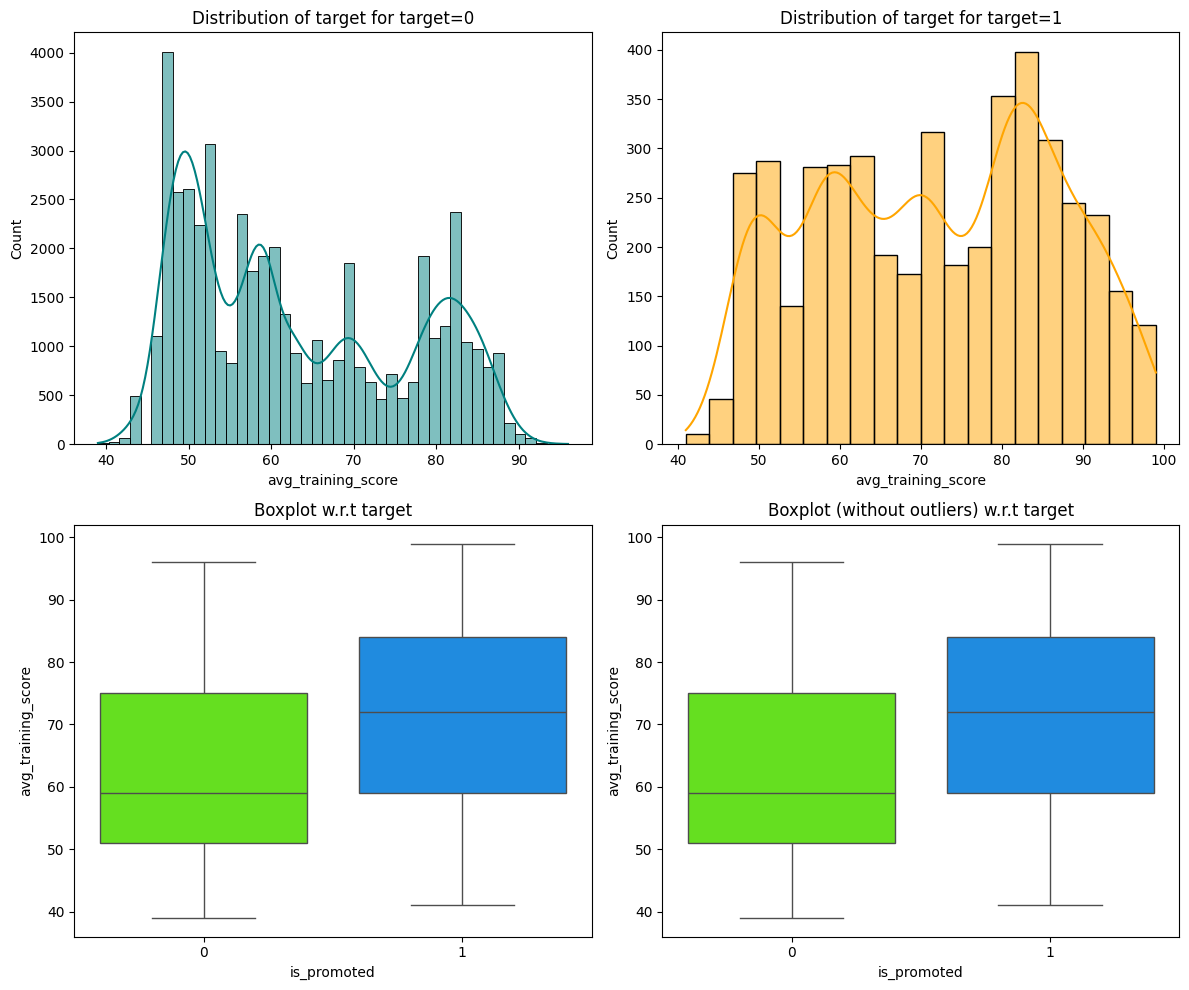

In [ ]:
distribution_plot_wrt_target(data, "avg_training_score", "is_promoted") ## to create distribution_plot for avg_training_score vs is_promoted

#### Target variable vs Department

is_promoted            0     1    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


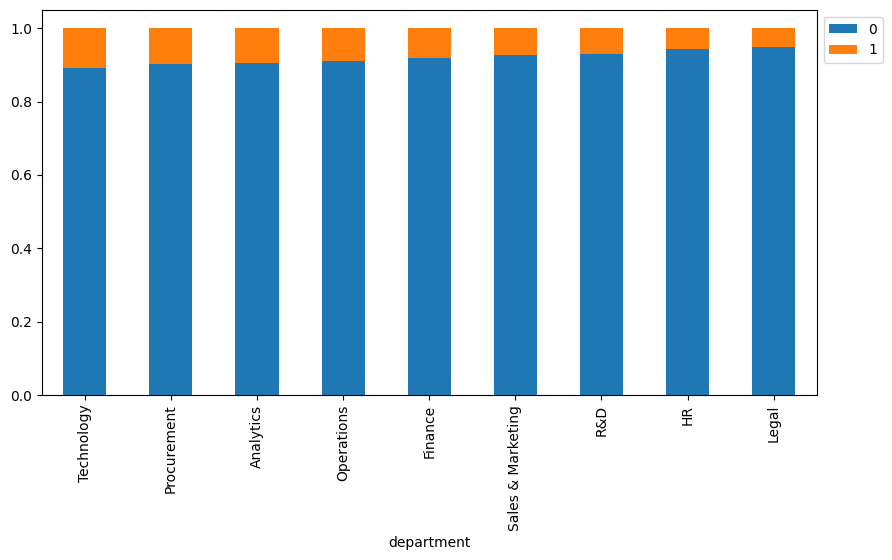

In [ ]:
stacked_barplot(data, "department", "is_promoted")

#### Target variable vs Region

is_promoted      0     1    All
region                         
All          50140  4668  54808
region_2     11354   989  12343
region_22     5694   734   6428
region_7      4327   516   4843
region_4      1457   246   1703
region_13     2418   230   2648
region_15     2586   222   2808
region_28     1164   154   1318
region_26     2117   143   2260
region_23     1038   137   1175
region_27     1528   131   1659
region_31     1825   110   1935
region_17      687   109    796
region_25      716   103    819
region_16     1363   102   1465
region_11     1241    74   1315
region_14      765    62    827
region_30      598    59    657
region_1       552    58    610
region_8       602    53    655
region_19      821    53    874
region_10      597    51    648
region_20      801    49    850
region_29      951    43    994
region_32      905    40    945
region_3       309    37    346
region_5       731    35    766
region_12      467    33    500
region_6       658    32    690
region_2

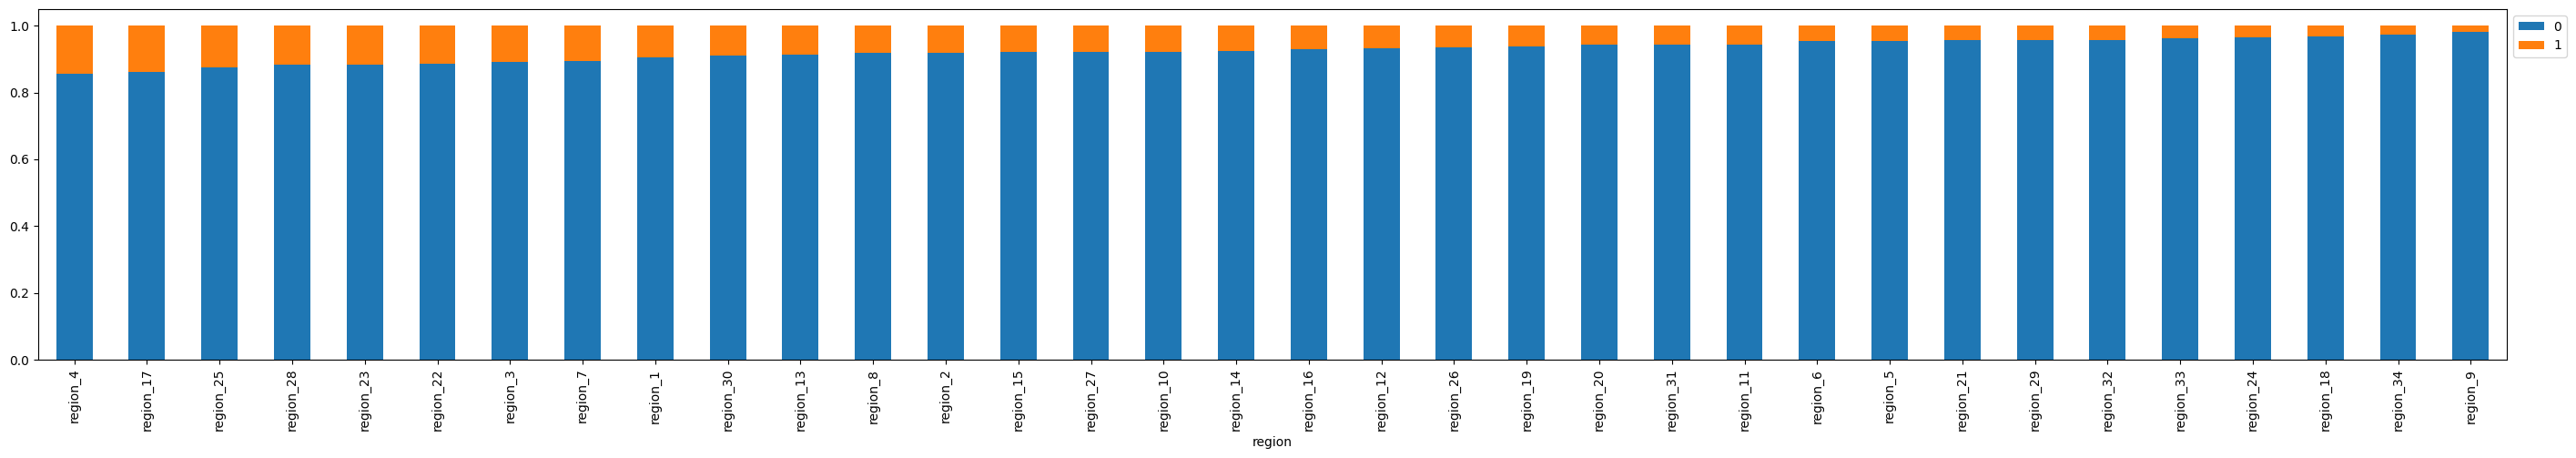

In [ ]:
stacked_barplot(data, "region", "is_promoted")

#### Target variable vs Education

is_promoted           0     1    All
education                           
All               47853  4546  52399
Bachelor's        33661  3008  36669
Master's & above  13454  1471  14925
Below Secondary     738    67    805
------------------------------------------------------------------------------------------------------------------------


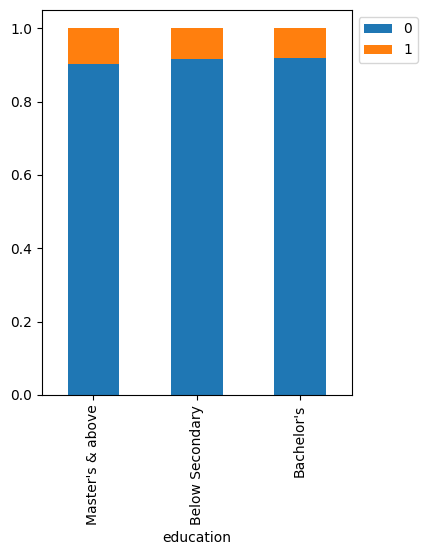

In [ ]:
stacked_barplot(data,"education", "is_promoted") ## to create distribution_plot for education vs is_promoted

#### Target variable vs Gender

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


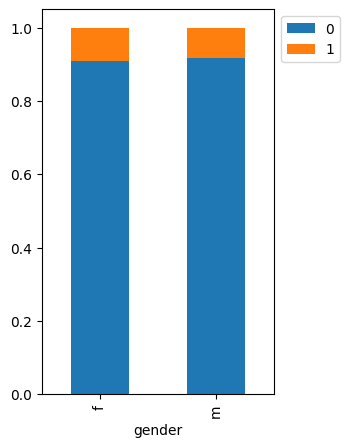

In [ ]:
stacked_barplot(data,"gender", "is_promoted") ## to create distribution_plot for gender vs is_promoted

#### Target variable vs Recruitment Channel

is_promoted              0     1    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


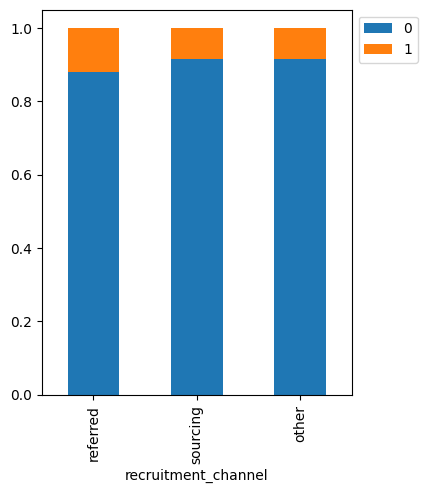

In [ ]:
stacked_barplot(data,"recruitment_channel", "is_promoted") ## to create distribution_plot for recruitment_channel vs is_promoted

**Let's see the previous rating(previous_year_rating) vary by the employee's promotion status (is_promoted)**

#### Target variable vs Previous Year Rating

is_promoted               0     1    All
previous_year_rating                    
 All                  46355  4329  50684
5.000                  9820  1921  11741
3.000                 17263  1355  18618
4.000                  9093   784   9877
2.000                  4044   181   4225
1.000                  6135    88   6223
------------------------------------------------------------------------------------------------------------------------


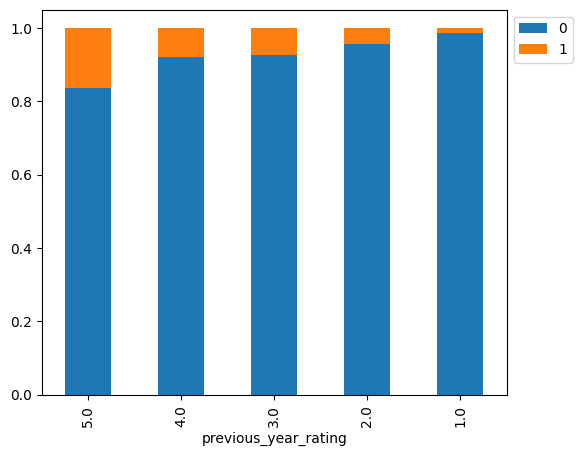

In [ ]:
stacked_barplot(data,"previous_year_rating", "is_promoted") ## to create distribution_plot for previous_year_rating vs is_promoted

#### Target variable vs Awards Won

is_promoted      0     1    All
awards_won                     
All          50140  4668  54808
0            49429  4109  53538
1              711   559   1270
------------------------------------------------------------------------------------------------------------------------


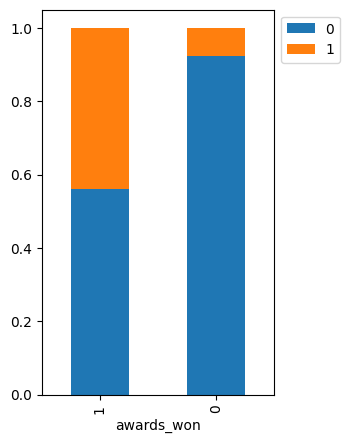

In [ ]:
stacked_barplot(data,"awards_won", "is_promoted") ## to create distribution_plot for awards_won vs is_promoted

<Axes: xlabel='awards_won', ylabel='avg_training_score'>

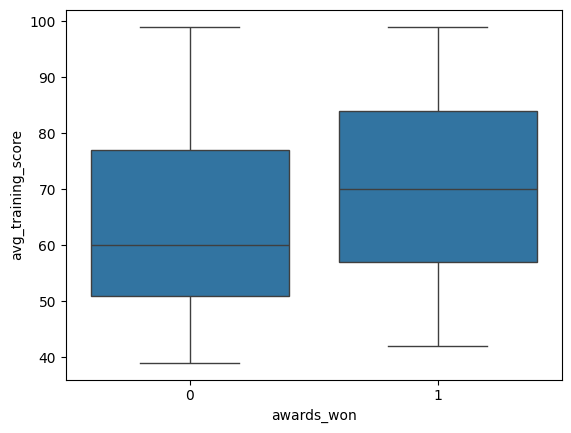

In [ ]:
sns.boxplot(data=data, x="awards_won", y="avg_training_score")

**Let's see the attributes that have a strong correlation with each other**

### Correlation Heatmap

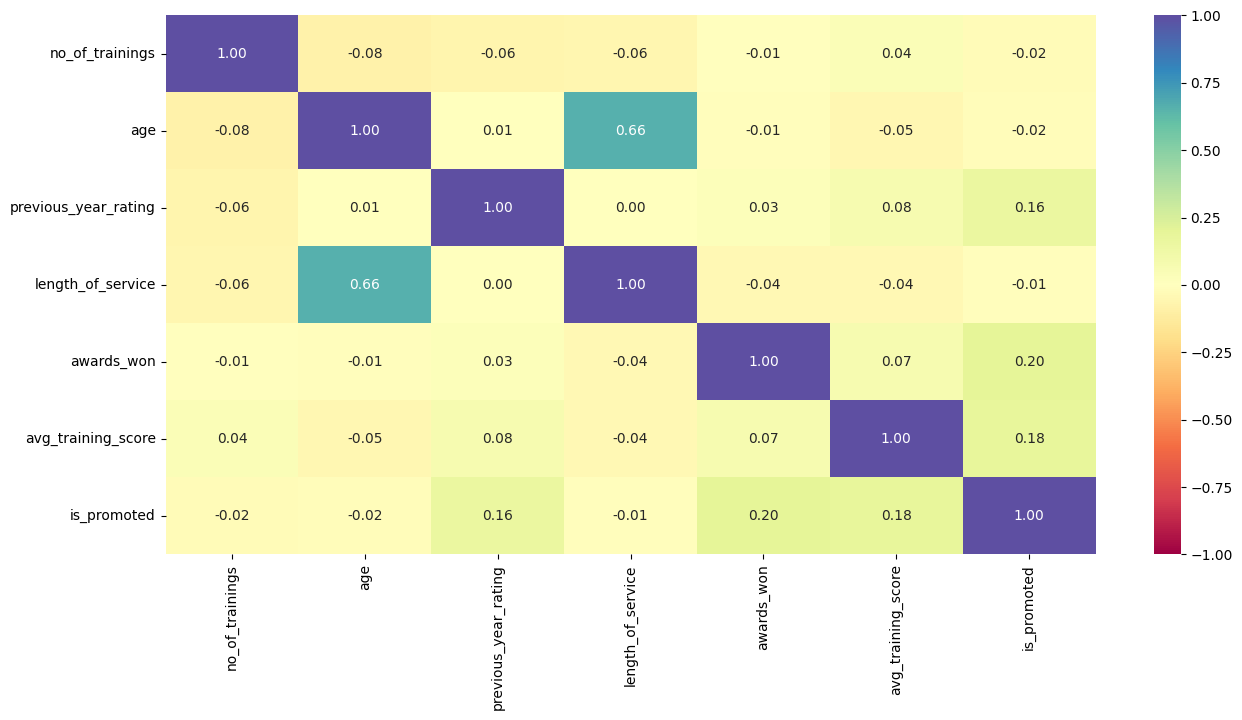

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Preprocessing

In [ ]:
data1 = data.copy()

### Train-Test Split

In [ ]:
X = data1.drop(["is_promoted"], axis=1)
y = data1["is_promoted"]

In [ ]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y) ## to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.75, random_state=1, stratify = y_temp) ## to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(43846, 11) (8222, 11) (2740, 11)


### Missing value imputation

In [ ]:
# Defining the imputers for numerical and categorical variables
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_median = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train[["education"]] = imputer_mode.fit_transform(X_train[["education"]])

# Transform the validation data
X_val[["education"]]  =  imputer_mode.fit_transform(X_val[["education"]]) ## to impute missing values in X_val

# Transform the test data
X_test[["education"]] = imputer_mode.fit_transform(X_test[["education"]]) ## to impute missing values in X_test


In [ ]:
# Fit and transform the train data
X_train[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_train[["previous_year_rating", "avg_training_score"]]
)

# Transform the validation data
X_val[["previous_year_rating", "avg_training_score"]]  =  imputer_median.fit_transform(
    X_val[["previous_year_rating", "avg_training_score"]]) ## to impute missing values in X_val

# Transform the test data
X_test[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_test[["previous_year_rating", "avg_training_score"]]) ## to impute missing values in X_test


In [ ]:
# Checking that no column has missing values in train, validation and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype(float)

X_val = pd.get_dummies(X_val, drop_first=True)  ## to impute missing values in X_val
X_val = X_val.astype(float)

X_test = pd.get_dummies(X_test, drop_first=True)  ## to impute missing values in X_val
X_test = X_test.astype(float)

print(X_train.shape, X_val.shape, X_test.shape)
print(X_train.shape, X_test.shape)

(43846, 52) (8222, 52) (2740, 52)
(43846, 52) (2740, 52)


## Building the model

### Model evaluation criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred, average="macro")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
from sklearn import metrics # import metrics module from sklearn
scorer = metrics.make_scorer(metrics.f1_score)
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss"))) ## to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Bagging: 0.4448356270354221
Random forest: 0.39270537729931354
GBM: 0.4251075760793589
Adaboost: 0.2327711293145512
Xgboost: 0.47725056021493106

Validation Performance:

Bagging: 0.45454545454545453
Random forest: 0.41509433962264153
GBM: 0.45905172413793105
Adaboost: 0.23832923832923833
Xgboost: 0.505175983436853


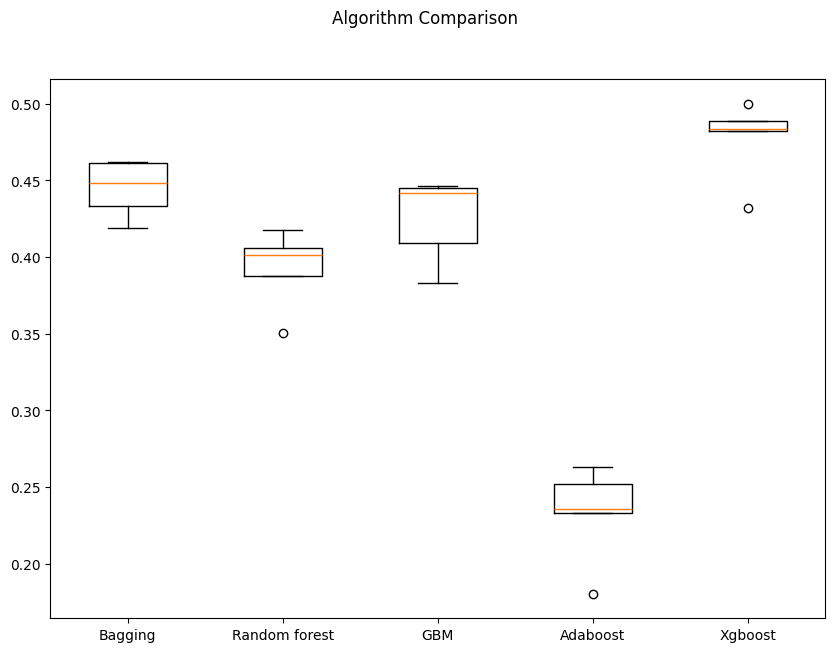

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 3734
Before Oversampling, counts of label 'No': 40112 

After Oversampling, counts of label 'Yes': 40112
After Oversampling, counts of label 'No': 40112 

After Oversampling, the shape of train_X: (80224, 52)
After Oversampling, the shape of train_y: (80224,) 



In [ ]:
models = []  # Empty list to store all the models
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))
## Note - Take reference from the original models built above


Cross-Validation Cost:

Bagging: 0.9555283030450334
Random forest: 0.9609282658102083
GBM: 0.9340863436772453
Adaboost: 0.8869540038523611
Xgboost: 0.9623382642587831

Validation Performance:

Bagging: 0.40409683426443205
Random forest: 0.35662148070907196
GBM: 0.35027027027027025
Adaboost: 0.33113828786453436
Xgboost: 0.50920245398773


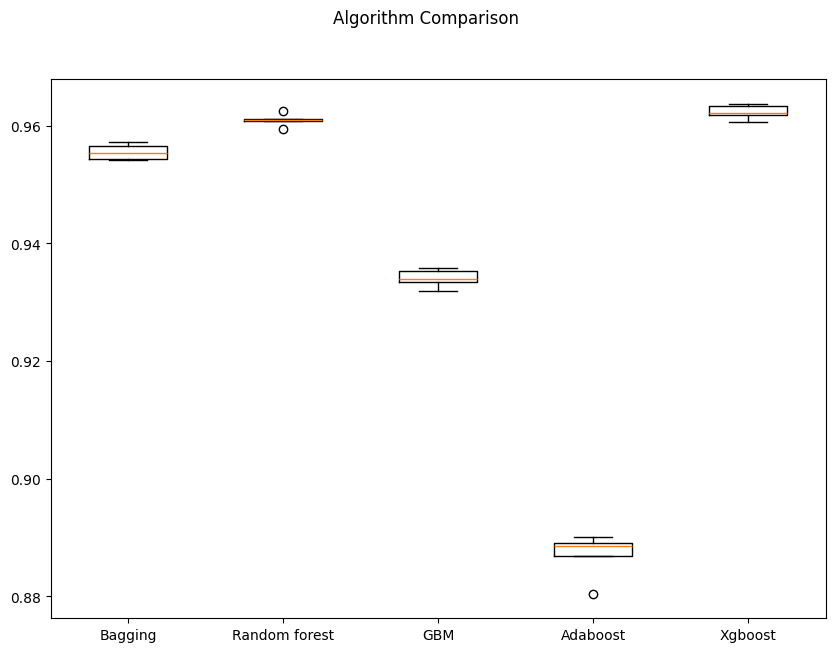

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 3734
Before Under Sampling, counts of label 'No': 40112 

After Under Sampling, counts of label 'Yes': 3734
After Under Sampling, counts of label 'No': 3734 

After Under Sampling, the shape of train_X: (7468, 52)
After Under Sampling, the shape of train_y: (7468,) 



In [ ]:
models = []  # Empty list to store all the models
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Bagging: 0.6686470927982864
Random forest: 0.6963626339482751
GBM: 0.69516833962057
Adaboost: 0.6704030563061985
Xgboost: 0.6946237314335888

Validation Performance:

Bagging: 0.29718599862731643
Random forest: 0.30244870946393115
GBM: 0.34863123993558776
Adaboost: 0.23627519110493397
Xgboost: 0.31439265056141547


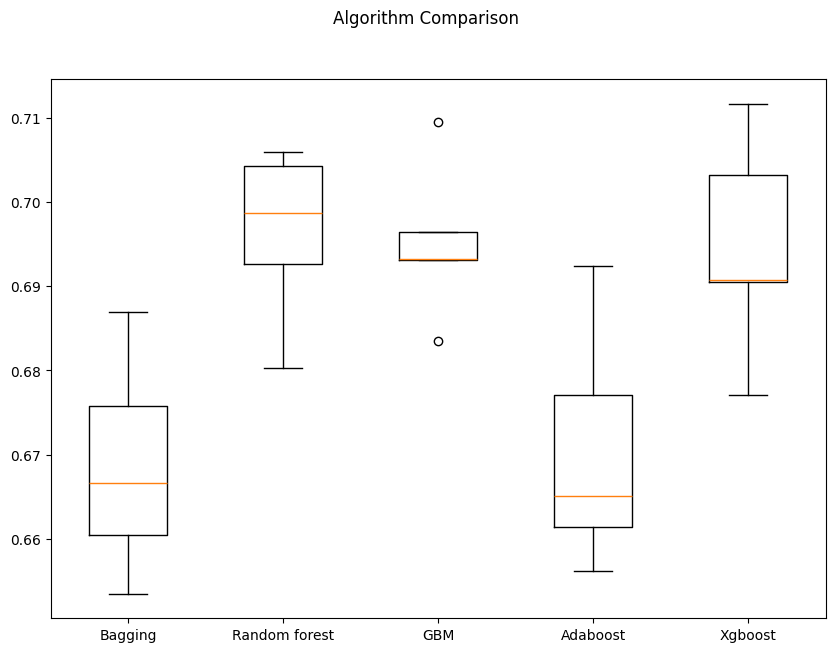

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Hyperparameter Tuning

#### Tuning AdaBoost using Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)  ## to fit the model on undersampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(70), 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7092365867486399:
CPU times: user 2min 19s, sys: 370 ms, total: 2min 19s
Wall time: 2min 28s


In [ ]:
# Creating new pipeline with best parameters
tuned_adb1 = AdaBoostClassifier( random_state=1,
    n_estimators= 50, learning_rate= 1, estimator= DecisionTreeClassifier(max_depth=2, random_state=1)
) ## adding the best parameters obtained from tuning

tuned_adb1.fit(X_train_un, y_train_un) ## to fit the model on undersampled data

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=1, random_state=1)

In [ ]:
adb1_train = model_performance_classification_sklearn(tuned_adb1,X_train_un, y_train_un) ## to check the performance on training set
adb1_train

Accuracy  Recall  Precision    F1
0     0.700   0.659      0.719 0.700

In [ ]:
# Checking model's performance on validation set
adb1_val =  model_performance_classification_sklearn(tuned_adb1, X_val, y_val) ## to check the performance on validation set
adb1_val

Accuracy  Recall  Precision    F1
0     0.743   0.663      0.199 0.574

#### Tuning AdaBoost using original data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(70), 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.6469262291040385:


In [ ]:
# Creating new pipeline with best parameters
tuned_adb2 = AdaBoostClassifier( random_state=1,
    n_estimators= 70, learning_rate= 1, estimator= DecisionTreeClassifier(max_depth= 3, random_state= 1)
) ## adding the best parameters obtained from tuning

tuned_adb2.fit(X_train, y_train) ## to fit the model on original data

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=1, n_estimators=70, random_state=1)

In [ ]:
adb2_train = model_performance_classification_sklearn(tuned_adb2,X_train, y_train) ## to check the performance on training set
adb2_train

Accuracy  Recall  Precision    F1
0     0.928   0.215      0.767 0.648

In [ ]:
# Checking model's performance on validation set
adb2_val =  model_performance_classification_sklearn(tuned_adb2, X_val, y_val) ## to check the performance on validation set
adb2_val

Accuracy  Recall  Precision    F1
0     0.928   0.217      0.784 0.651

#### Tuning Gradient Boosting using undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': np.int64(100), 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7212758018488019:
CPU times: user 2min 58s, sys: 494 ms, total: 2min 59s
Wall time: 3min 1s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features= 0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate= 0.2,
    n_estimators= 100,
    subsample= 0.7,
)## the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5, random_state=1,
                           subsample=0.7)

In [ ]:
gbm1_train = model_performance_classification_sklearn(tuned_gbm1,X_train_un, y_train_un) ## to check the performance on undersampled train set
gbm1_train

Accuracy  Recall  Precision    F1
0     0.761   0.703      0.794 0.760

In [ ]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1,X_val, y_val) ## to check the performance on validation set
gbm1_val

Accuracy  Recall  Precision    F1
0     0.776   0.662      0.224 0.600

#### Tuning Gradient Boosting using original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(125), 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7188961564558041:
CPU times: user 13min 17s, sys: 1.48 s, total: 13min 18s
Wall time: 13min 24s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features= 0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate= 0.2,
    n_estimators= 125,
    subsample= 0.7,
)## the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train, y_train) ## to check the performance on original data
gbm2_train

Accuracy  Recall  Precision    F1
0     0.941   0.328      0.956 0.729

In [ ]:
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val) ## to check the performance on validation set
gbm2_val

Accuracy  Recall  Precision    F1
0     0.940   0.324      0.915 0.723

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient boosting trained with Undersampled data  \
Accuracy                                              0.761   
Recall                                                0.703   
Precision                                             0.794   
F1                                                    0.760   

           Gradient boosting trained with Original data  \
Accuracy                                          0.941   
Recall                                            0.328   
Precision                                         0.956   
F1                                                0.729   

           AdaBoost trained with Undersampled data  \
Accuracy                                     0.700   
Recall                                       0.659   
Precision                                    0.719   
F1                                           0.700   

           AdaBoost trained with Original data  
Accuracy                                 0.928  
Recall                                   0.215  
Precision                                0.767  
F1                                       0.648

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,
        adb1_val.T,
        adb2_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Gradient boosting trained with Undersampled data  \
Accuracy                                              0.776   
Recall                                                0.662   
Precision                                             0.224   
F1                                                    0.600   

           Gradient boosting trained with Original data  \
Accuracy                                          0.940   
Recall                                            0.324   
Precision                                         0.915   
F1                                                0.723   

           AdaBoost trained with Undersampled data  \
Accuracy                                     0.743   
Recall                                       0.663   
Precision                                    0.199   
F1                                           0.574   

           AdaBoost trained with Original data  
Accuracy                                 0.928  
Recall                                   0.217  
Precision                                0.784  
F1                                       0.651

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test) ## to check the performance on original data
gbm2_test

Accuracy  Recall  Precision    F1
0     0.941   0.313      0.961 0.720

In [ ]:
adb2_test = model_performance_classification_sklearn(tuned_adb2, X_test, y_test) ## to check the performance on original data
adb2_test

Accuracy  Recall  Precision    F1
0     0.926   0.210      0.731 0.644

### Feature Importances

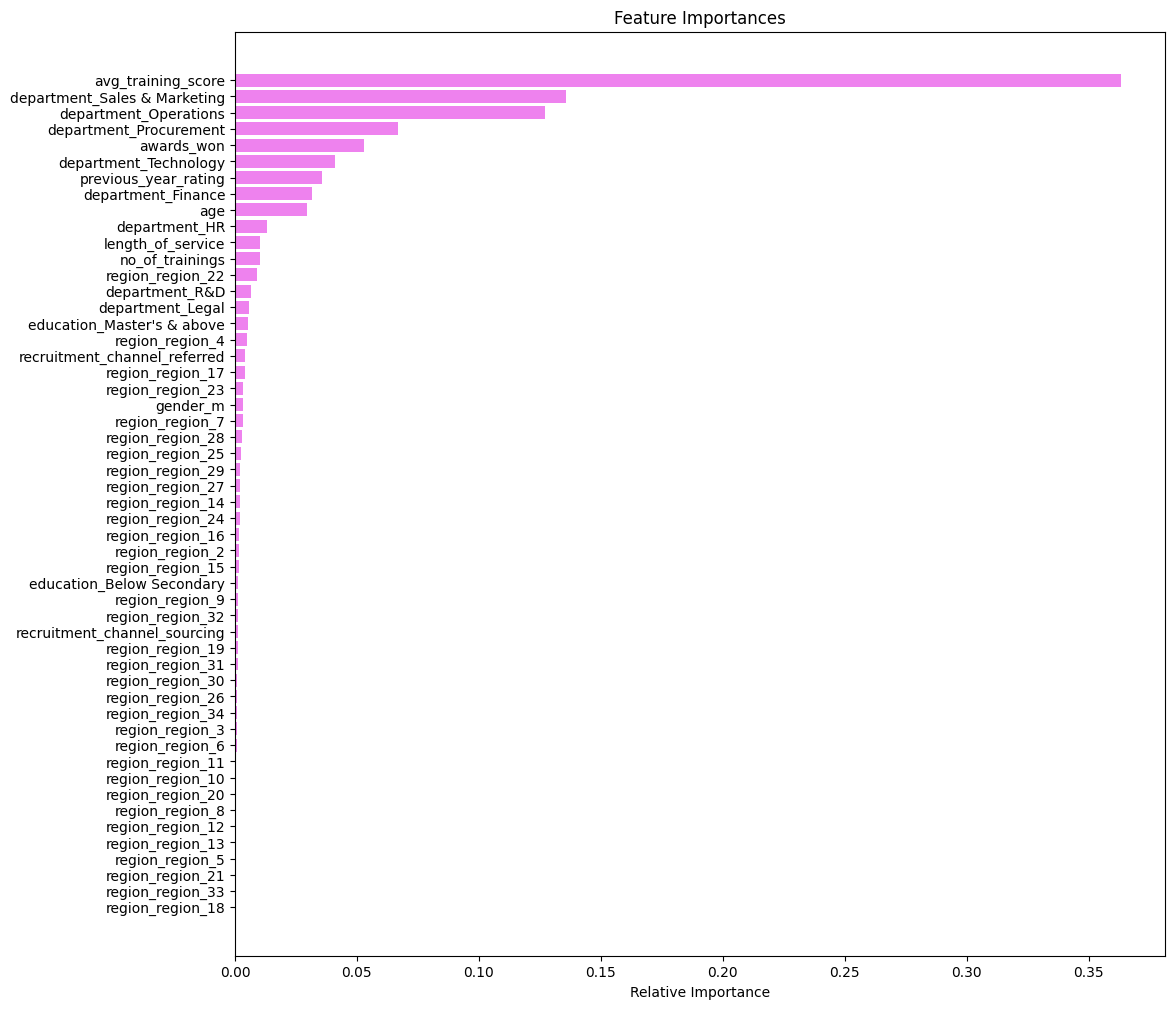

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_ ## to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


- There were few missing values in the data set for Education, Previous year Rating and Average Training score columns. The missing values were added by considering the mode (highest occurrence) for Education and median for previous year rating and Average Training score columns.

- We prioritized the F1 score to ensure minimization of False positives as well as False negatives as both cases are
important while considering any employee for promotion.

- To create the final model, we used a Gradient Boosting Classifier and did hyperparameter tuning used RandomizedSearchCV on the Original data set to improve the model performance. Undersampling and Oversampling techniques were also tried but they did not seem too effective in this scenario.

- The resultant model when tested across the validation & test set generalized very well giving an F1 score of 0.72 for the test set. Metrics for all 3 datasets are provided below. The model is expected to be consistent and performing well.

Few Recommendations to create a better model would be:

- to ensure all the data (e.g., Education, Previous year Rating and Avg Training score) are available to create a more robust model.

- Also, if there are certain parameters which need to be prioritized like Education, Length of service etc. they need to be enforced.
Training set Validation set Test set


***